<h1>Content</h1>

1. Research data from files
2. Data preparation
    * 2.1. Processing NaNs
    * 2.2. Data types conversion
    * 2.3. Checking for duplicates
    * 2.4. Preparing data for the analysis
3. Data Analysis & Description
4. Tests of hypotheses
5. General conclusion

# Finding out of a profitable tariff for the telecom company

We have at our disposal the data of 500 users of telecom company "Megaline": who they are, where they are from, what tariff they use, how many calls and messages each sent in 2018. We have to analyze the behavior of customers and draw a conclusion - which tariff is better.

**Tariff description**

<u>Tariff «Smart»</u>

Monthly charge: 550 RUB<br>
Include 500 minutes to call, 50 SMS and 15 Gb internet traffic.<br>
Additional charges over tariff limits:
1. 1 minute to call: 3 RUB («Megaline» always rounds up minutes and Mbs. If the user spoke for only 1 second, a whole minute is counted in the tariff);
2. 1 SMS: 3 RUB;
3. 1 Gb internet: 200 RUB.

<br>
<u>Tariff «Ultra»</u>

Monthly charge: 1950 RUB<br>
Include 3000 minutes to call, 1000 SMS and 30 Gb internet traffic.<br>
Additional charges over tariff limits:
1. 1 minute to call: 1 RUB;
2. 1 SMS: 1 RUB;
3. 1 Gb internet:: 150 RUB.

*Please note:
Megaline always rounds seconds to minutes, and megabytes to gigabytes. Each call is rounded up separately: even if it lasted only 1 second, it will be counted as 1 minute.
For web traffic, individual sessions are not counted. Instead, the monthly total is rounded up. If a subscriber uses 1025 megabytes this month, they will be charged for 2 gigabytes.*
<br><br>

**Data description**

<u>1. Table users (users' information):</u>
- user_id — unique user's id;
- first_name — user's first name;
- last_name — user's last name;
- age — user's age (years);
- reg_date — start date of using the tariff (day, month, year);
- churn_date — termination date of using the tariff (if the value is omitted, then the tariff was still valid at the time of uploading the data);
- city — city where user lives;
- tariff — name of tariff.

<u>2. Table calls (users' calls information):</u>
- id — unique call's id;
- call_date — date of call;
- duration — call's duration in minutes (value 0 means missed call);
- user_id — id of user, which made the call.

<u>3. Table messages (SMS's information):</u>
- id — unique SMS id;
- message_date — date of SMS;
- user_id — id of user, which sent the SMS.
    
<u>4. Table internet (internet sessions' information):</u>
- id — unique session's id;
- mb_used — the amount of Internet traffic spent per session (in megabytes);
- session_date — date of session;
- user_id — id of user.
    
<u>5. Table tariffs (tariff's information):</u>
- tariff_name — name of tariff;
- rub_monthly_fee — Monthly charge in RUB;
- minutes_included — the number of minutes of calls per month included in the monthly charge;
- messages_included — number of messages per month included in the monthly charge;
- mb_per_month_included — the amount of Internet traffic included in the monthly charge (in megabytes);
- rub_per_minute — the cost of a minute of calls over the tariff package (for example, if the tariff includes 100 minutes of conversation per month, then a fee will be charged from 101st minutes);
- rub_per_message — cost of sending a message over the tariff package;
- rub_per_gb — the cost of an additional gigabyte of Internet traffic over the tariff package (1 gigabyte = 1024 megabytes).

## Research data from files

Import of libraries:

In [1]:
from matplotlib import pyplot as plt
from scipy import stats as st
import pandas as pd
import numpy as np

Reading a data file, viewing dataframe information and displaying 5 random lines:

In [2]:
users = pd.read_csv('D:\\Work\\Яндекс-практикум\\Курс 4. Статистический анализ данных\\users.csv')
users.info()
users.sample(n=5, random_state=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
304,1304,68,NaN,Владимир,Илья,Соловьёв,2018-11-05,ultra
340,1340,50,NaN,Пенза,Тимофей,Алютин,2018-01-30,smart
47,1047,67,NaN,Саратов,Милица,Меркулова,2018-10-29,smart
67,1067,45,NaN,Москва,Юзефа,Абашкина,2018-04-09,smart
479,1479,40,NaN,Хабаровск,Игорь,Богданов,2018-07-03,smart


In [3]:
calls = pd.read_csv('D:\Work\Яндекс-практикум\Курс 4. Статистический анализ данных\calls.csv')
calls.info()
calls.sample(n=5, random_state=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
26953,1066_374,2018-08-26,0.00,1066
66122,1168_1273,2018-03-28,16.05,1168
67325,1171_350,2018-09-14,6.23,1171
74643,1186_465,2018-09-02,0.79,1186
192311,1472_124,2018-05-04,5.94,1472


In [4]:
messages = pd.read_csv('D:\Work\Яндекс-практикум\Курс 4. Статистический анализ данных\messages.csv')
messages.info()
messages.sample(n=5, random_state=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
45696,1197_26,2018-12-31,1197
66091,1282_523,2018-11-30,1282
18743,1082_184,2018-10-18,1082
33759,1146_557,2018-12-22,1146
11403,1048_49,2018-09-27,1048


In [5]:
internet = pd.read_csv('D:\Work\Яндекс-практикум\Курс 4. Статистический анализ данных\internet.csv', index_col=0)
internet.info()
internet.sample(n=5, random_state=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
35745,1124_125,122.45,2018-12-03,1124
18383,1064_102,320.60,2018-12-19,1064
59774,1203_22,605.96,2018-06-17,1203
56317,1188_123,781.73,2018-05-08,1188
52231,1176_386,150.98,2018-08-20,1176


In [6]:
tariffs = pd.read_csv('D:\\Work\\Яндекс-практикум\\Курс 4. Статистический анализ данных\\tariffs.csv')
tariffs.info()
tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Conclusion**

Table `users` includes 8 columns, of which 2 have integer type, the rest are objects. In the column `churn_date` the numbers of data are different from the numbers of data in other columns, therefore, this column includes NaNs. From the description we know, that if the value is omitted, then the tariff was still valid at the time of uploading the data. However these gaps are needed to be filledto make the dataframe appropriate for analysis. In the columns `reg_date` and `churn_date` are dates, but they have the object data type, that's why we need to convert this datatype to datetime, and also convert int64 in interger type with less memory consumption.

Tables `calls`, `messages`, `internet`, `tariffs` do not include NaNs, however the data types is also needed to be convert - columns with dates convert to type "datetime", optimize integer and object types to spare the memory.

## Data preparation

### Processing NaNs

As we have noted in the previous chapter, only the table `users` contains the NaNs in the column `churn_date`. Let's print the gaps' quantity in the whole table on the screen:

In [7]:
users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

During this research we need to learn users behaviour, therefore a marker that the client is still using the tariff is important for us. Let's choose as the marker the big future date (2100-01-01) and fill the gaps:

In [8]:
users['churn_date'] = users['churn_date'].fillna('2100-01-01')
print('Number of NaNs in the column "churn_date" after filling:', users['churn_date'].isnull().sum())

Number of NaNs in the column "churn_date" after filling: 0


Let's check the absence of gaps in each of the dataframes: `users`, `calls`, `messages`, `internet`. Dataframe `tariffs` is not needed to check, because it contains only two lines, which we have printed on the screen at the previous step, and could see, that there are no NaNs.

In [9]:
users.isnull().sum()

user_id       0
age           0
churn_date    0
city          0
first_name    0
last_name     0
reg_date      0
tariff        0
dtype: int64

In [10]:
calls.isnull().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [11]:
messages.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [12]:
internet.isnull().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

**Conclusion**

The NaNs in the table `users` in the column `churn_date` have been filled. Also we have checked the other dataframe for searching NaNs. In the other tables there are no gaps.

### Data types conversion

Earlier we saw that some columns have data types that are inconvenient for research or uneconomical for memory.

Dataframe `users`:
- the columns `reg_date` and `churn_date` contain dates, but have object type. Let's convert these columns in format of date with the method `to_datetime()`;
- for the column `age` the type "uint8" will be enough, because the values here do not take negative values and values exceeding the number 256;
- we also convert the column `user_id` in "uint16" with method `astype()`.

In [13]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

users['age'] = users['age'].astype('uint8')
users['user_id'] = users['user_id'].astype('uint16')

print('Data types in the table "users" have been changed, here is the result:')
print()
users.info()

Data types in the table "users" have been changed, here is the result:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    uint16        
 1   age         500 non-null    uint8         
 2   churn_date  500 non-null    datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), object(4), uint16(1), uint8(1)
memory usage: 25.0+ KB


Dataframe `calls`:

- the column `call_date` contains, but have object type. Let's convert these columns in format of date with the method `to_datetime()`;
- the column `user_id` we convert to "uint16" with the method `astype()`;
- let's change the data type in the column `duration` to "float32".

In [14]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['user_id'] = calls['user_id'].astype('uint16')
calls['duration'] = calls['duration'].astype('float32')

print('Data types in the table "calls" have been changed, here is the result:')
print()
calls.info()

Data types in the table "calls" have been changed, here is the result:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float32       
 3   user_id    202607 non-null  uint16        
dtypes: datetime64[ns](1), float32(1), object(1), uint16(1)
memory usage: 4.3+ MB


Dataframe `messages`:

- in the column `message_date` dates were saved, so convert it to date type with method `to_datetime()`;
- let's change the column `user_id` to "uint16" with method `astype()`.

In [15]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['user_id'] = messages['user_id'].astype('uint16')

print('Data types in the table "messages" have been changed, here is the result:')
print()
messages.info()

Data types in the table "messages" have been changed, here is the result:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  uint16        
dtypes: datetime64[ns](1), object(1), uint16(1)
memory usage: 2.1+ MB


Датафрейм `internet`:

- let's change the data type of the column `session_date` from object to date with method `to_datetime()`;
- the column `user_id` is needed to be convert to "uint16" with method `astype()`;
- let's change the data type of the column `mb_used` to "float32".

In [16]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['user_id'] = internet['user_id'].astype('uint16')
internet['mb_used'] = internet['mb_used'].astype('float32')

print('Data types in the table "internet" have been changed, here is the result:')
print()
internet.info()

Data types in the table "internet" have been changed, here is the result:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float32       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  uint16        
dtypes: datetime64[ns](1), float32(1), object(1), uint16(1)
memory usage: 4.3+ MB


Dataframe `tariffs`:
- the data type of the columns `rub_per_gb`, `rub_per_message`, `rub_per_minute` will be converted to "uint8";
- let's convert the data type of the columns `messages_included`, `mb_per_month_included`, `minutes_included`, `rub_monthly_fee` to the type "uint16". For changing we use the method `astype()`.

In [17]:
tariffs['rub_per_gb'] = tariffs['rub_per_gb'].astype('uint8')
tariffs['rub_per_message'] = tariffs['rub_per_message'].astype('uint8')
tariffs['rub_per_minute'] = tariffs['rub_per_minute'].astype('uint8')

tariffs['messages_included'] = tariffs['messages_included'].astype('uint16')
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'].astype('uint16')
tariffs['minutes_included'] = tariffs['minutes_included'].astype('uint16')
tariffs['rub_monthly_fee'] = tariffs['rub_monthly_fee'].astype('uint16')

print('Data types in the table "tariffs" have been changed, here is the result:')
print()
tariffs.info()

Data types in the table "tariffs" have been changed, here is the result:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      uint16
 1   mb_per_month_included  2 non-null      uint16
 2   minutes_included       2 non-null      uint16
 3   rub_monthly_fee        2 non-null      uint16
 4   rub_per_gb             2 non-null      uint8 
 5   rub_per_message        2 non-null      uint8 
 6   rub_per_minute         2 non-null      uint8 
 7   tariff_name            2 non-null      object
dtypes: object(1), uint16(4), uint8(3)
memory usage: 166.0+ bytes


**Conclusion**

The data types in each dataframe are made more convenient and logical. As a result, memory consumption was reduced by 27%.

### Checking for duplicates

Let's check our dataframes (except `tariffs`) for duplicates:

In [18]:
print('Number of duplicates in dataframe "users":', users.duplicated().sum())
print('Number of duplicates in dataframe "calls":', calls.duplicated().sum())
print('Number of duplicates in dataframe "messages":', messages.duplicated().sum())
print('Number of duplicates in dataframe "internet":', internet.duplicated().sum())

Number of duplicates in dataframe "users": 0
Number of duplicates in dataframe "calls": 0
Number of duplicates in dataframe "messages": 0
Number of duplicates in dataframe "internet": 0


No duplicates have been found.

**Conclusion**

Each dataframe was checked for duplicates, and no duplicates were found.

### Preparing data for the analysis

Display the numerical description of the columns:
- `duration` from `calls`;
- `mb_used` from `internet`.

In [19]:
calls['duration'].describe()

count    202607.000000
mean          6.755849
std           5.842877
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [20]:
internet['mb_used'].describe()

count    149396.000000
mean        370.190918
std         278.319153
min           0.000000
25%         138.187496
50%         348.014999
75%         559.552490
max        1724.829956
Name: mb_used, dtype: float64

For both columns the minimum value is 0.

In case of calls' duration `calls['duration']` we know, that zero values correspond to missed calls. In order to analyze user behavior, we need to know not only the duration, but also the number of calls, we do not need to delete zero values here, they will be useful to us.

In the column `internet['mb_used']` zero values mean perhaps, that zeros means the fact of connecting to the internet. In this case, zero values have no worth for us, since we are interested in the amount of traffic spent, but not the number of Internet sessions. Therefore, rows with zero in `mb_used` will be excluded.

In [21]:
internet = internet[internet['mb_used'] != 0]
internet = internet.reset_index(drop=True)

In the dataframes there are the columns `calls`, `messages`, `internet` with date of a call, a SMS and an internet-session respectively. Let's add to them the columns with a month and a year.

In [22]:
calls['month_year'] = calls['call_date'].dt.to_period('M')
messages['month_year'] = messages['message_date'].dt.to_period('M')
internet['month_year'] = internet['session_date'].dt.to_period('M')

Since Megaline always rounds seconds to minutes, and each call is rounded separately (even if it lasted only 1 second, it will be counted as 1 minute), then we will round the number of minutes up to an integer in `calls['duration']`.

In [23]:
calls['duration'] = np.ceil(calls['duration']).astype('uint16')

Let's group the data in the table `calls` by user and month, and then calculate for each group the total duration of calls and their number (the sum and the number in the column `duration`) and save the result in the variable `calls_per_user`. Let's display the names of the columns of the resulting dataframe.

In [24]:
calls_per_user = (calls
                  .groupby(['user_id', 'month_year'])
                  .agg({'duration': ['count', 'sum']})
                  .reset_index()
                 )
calls_per_user.columns = list(calls_per_user.columns)
calls_per_user.columns

Index([('user_id', ''), ('month_year', ''), ('duration', 'count'),
       ('duration', 'sum')],
      dtype='object')

Rename columns in the dataframe `calls_per_user`.

In [25]:
calls_per_user.rename(columns={('user_id',''): 'user_id',
                               ('month_year',''): 'month_year',
                               ('duration', 'count'): 'calls_quantity',
                               ('duration', 'sum'): 'sum_calls_duration'},
                      inplace=True)
calls_per_user.columns

Index(['user_id', 'month_year', 'calls_quantity', 'sum_calls_duration'], dtype='object')

Similarly, we group the data in the `messages` and `internet` tables by the `user_id` and `month_year` columns, and calculate for each group the number of messages (the number in the `id` column) and the total amount of Internet traffic (the sum in the `mb_used` column ) respectively. Save the resulting dataframes in `messages_per_user` and `internet_per_user`. In the `messages_per_user` table, we  rename the column with the uninformative name `id` to `messages_quantity`.

In [26]:
messages_per_user = messages.groupby(['user_id', 'month_year'])['id'].count().reset_index()
messages_per_user.rename(columns={'id': 'messages_quantity'}, inplace=True)

internet_per_user = internet.groupby(['user_id', 'month_year'])['mb_used'].sum().reset_index()

Let's add information about the number and duration of calls (table `calls_per_user`) first to information about the number of SMS messages (table `messages_per_user`), and save the result in the variable `calls_messages_per_user`. We will merge on two columns - `user_id`, `month_year`, and choose the merging method `how='outer'` so that no data is lost when joining tables.

In [27]:
calls_messages_per_user = calls_per_user.merge(messages_per_user, on = ['user_id', 'month_year'], how='outer')

Now we will similarly attach information about Internet traffic to the `calls_messages_per_user` dataframe (table `internet_per_user`). The result will be saved in the final dataframe `users_behavior`.

In [28]:
users_behavior = calls_messages_per_user.merge(internet_per_user, on=['user_id', 'month_year'], how='outer')

With a merge type of `how='outer'`, NaNs may appear in the resulting table. For example, if a user used calls and the Internet in some month, but send no SMS. It is clear that such gaps must be filled with zero values. Let's see which columns of the `users_behavior` dataframe have gaps:

In [29]:
users_behavior.isnull().sum()

user_id                 0
month_year              0
calls_quantity         40
sum_calls_duration     40
messages_quantity     497
mb_used                13
dtype: int64

Let's fill the detected gaps with zeros:

In [30]:
users_behavior['calls_quantity'] = users_behavior['calls_quantity'].fillna(0)
users_behavior['sum_calls_duration'] = users_behavior['sum_calls_duration'].fillna(0)
users_behavior['messages_quantity'] = users_behavior['messages_quantity'].fillna(0)
users_behavior['mb_used'] = users_behavior['mb_used'].fillna(0)

print('Number of missing values by columns after filling in the gaps:')
print()
users_behavior.isnull().sum()

Number of missing values by columns after filling in the gaps:



user_id               0
month_year            0
calls_quantity        0
sum_calls_duration    0
messages_quantity     0
mb_used               0
dtype: int64

Let's convert megabytes of Internet traffic to gigabytes (1 GB = 1024 MB), since the calculation is based on gigabytes. Then round the gigabytes up to an integer. We write the result in a separate column `gb_used`:

In [31]:
users_behavior['gb_used'] = np.ceil(users_behavior['mb_used'] / 1024)

Let's add a column with the name of the tariff to the table - this will help us calculate the monthly revenue from each user. We will take the tariff from the user table `users`, in accordance with `user_id`.

In [32]:
users_behavior['tariff'] = np.nan
for i in users.index:
    users_behavior.loc[users_behavior['user_id'] == users.loc[i, 'user_id'],'tariff'] = users_behavior.loc[users_behavior['user_id'] == users.loc[i, 'user_id'],'tariff'].fillna(users.loc[i, 'tariff'])
    
users_behavior.head(10)    

,user_id,month_year,calls_quantity,sum_calls_duration,messages_quantity,mb_used,gb_used,tariff
0,1000,2018-05,22.0,159.0,22.0,2253.489990,3.0,ultra
1,1000,2018-06,43.0,172.0,60.0,23233.769531,23.0,ultra
2,1000,2018-07,47.0,340.0,75.0,14003.639648,14.0,ultra
3,1000,2018-08,52.0,408.0,81.0,14055.929688,14.0,ultra
4,1000,2018-09,58.0,466.0,57.0,14568.910156,15.0,ultra
5,1000,2018-10,57.0,350.0,73.0,14702.490234,15.0,ultra
6,1000,2018-11,43.0,338.0,58.0,14756.469727,15.0,ultra
7,1000,2018-12,46.0,333.0,70.0,9817.610352,10.0,ultra
8,1001,2018-11,59.0,430.0,0.0,18429.339844,18.0,smart
9,1001,2018-12,63.0,414.0,0.0,14036.660156,14.0,smart


Let's add a `gain` column with monthly revenue for each user. To find the revenue, we subtract the free limit of the total number of calls, messages and Internet traffic, multiply the remainder by the value from the tariff plan, add the subscription fee - all in accordance with the tariff - smart or ultra. If the remainder is negative, i.e. the subscriber has not gone beyond the limits included in the tariff, then 0 is taken as the remainder. Let's write a function for calculating revenue, which takes the values of the subscription fee, limits for calls, messages and the Internet from the `tariffs` table.

In [33]:
def profit_func(row):
    for i in tariffs.index:
        if row['tariff'] == tariffs.loc[i, 'tariff_name']:
            return (max(0, (row['sum_calls_duration'] - tariffs.loc[i, 'minutes_included'])) * tariffs.loc[i, 'rub_per_minute']) + (max(0, (row['messages_quantity'] - tariffs.loc[i, 'messages_included'])) * tariffs.loc[i, 'rub_per_message']) + (max(0, (row['gb_used'] - (tariffs.loc[i, 'mb_per_month_included'] / 1024))) * tariffs.loc[i, 'rub_per_gb']) + tariffs.loc[i, 'rub_monthly_fee']
        
users_behavior['gain'] = users_behavior.apply(profit_func, axis=1)
users_behavior.sample(n=5, random_state=1)

,user_id,month_year,calls_quantity,sum_calls_duration,messages_quantity,mb_used,gb_used,tariff,gain
1719,1275,2018-10,77.0,470.0,29.0,18446.070312,19.0,smart,1350.0
2922,1459,2018-11,82.0,662.0,29.0,15475.200195,16.0,smart,1236.0
1895,1302,2018-06,27.0,171.0,77.0,19664.109375,20.0,smart,1631.0
161,1025,2018-03,45.0,323.0,14.0,7332.689941,8.0,smart,550.0
255,1040,2018-11,54.0,437.0,0.0,19871.371094,20.0,smart,1550.0


**Conclusion**

We got the final table `users_behavior` describing the behavior of subscribers - what tariff they use, how many calls they make and how many SMS they send, how many minutes of conversation and how much Internet traffic they spend monthly. Also, for each user, the monthly revenue was calculated. The data is now ready for further analysis.

## Data Analysis & Description

Let's see how customer behavior differs depending on the tariff. Let's save users of different tariffs in different dataframes:

In [34]:
users_behavior_smart = users_behavior[users_behavior['tariff'] == 'smart'].copy()
users_behavior_ultra = users_behavior[users_behavior['tariff'] == 'ultra'].copy()

Let's display a numerical description of the samples for each tariff:

In [35]:
print('Numerical description of the behavior of users of the tariff "Smart":')
users_behavior_smart.describe().T

Numerical description of the behavior of users of the tariff "Smart":


,count,mean,std,min,25%,50%,75%,max
user_id,2229.0,1246.506505,146.119496,1001.0,1121.000000,1239.000000,1376.000000,1499.000000
calls_quantity,2229.0,58.463437,25.939858,0.0,40.000000,60.000000,76.000000,198.000000
sum_calls_duration,2229.0,417.934948,190.313730,0.0,282.000000,422.000000,545.000000,1435.000000
messages_quantity,2229.0,33.384029,28.227876,0.0,10.000000,28.000000,51.000000,143.000000
mb_used,2229.0,16208.396484,5870.475586,0.0,12643.009766,16506.839844,20042.929688,38552.449219
gb_used,2229.0,16.328848,5.747055,0.0,13.000000,17.000000,20.000000,38.000000
gain,2229.0,1289.973531,818.404367,550.0,550.000000,1023.000000,1750.000000,6770.000000


In [36]:
print('Numerical description of the behavior of users of the tariff "Ultra":')
users_behavior_ultra.describe().T

Numerical description of the behavior of users of the tariff "Ultra":


,count,mean,std,min,25%,50%,75%,max
user_id,985.0,1263.094416,140.694908,1000.0,1143.000000,1277.000000,1381.000000,1495.000000
calls_quantity,985.0,73.392893,43.916853,0.0,41.000000,74.000000,104.000000,244.000000
sum_calls_duration,985.0,526.623350,317.606098,0.0,284.000000,518.000000,752.000000,1673.000000
messages_quantity,985.0,49.363452,47.804457,0.0,6.000000,38.000000,79.000000,224.000000
mb_used,985.0,19468.789062,10087.171875,0.0,11770.259766,19308.009766,26837.689453,49745.691406
gb_used,985.0,19.494417,9.853510,0.0,12.000000,19.000000,27.000000,49.000000
gain,985.0,2070.152284,376.187114,1950.0,1950.000000,1950.000000,1950.000000,4800.000000


It can be seen that the number of users of the more expensive ultra tariff is more than 2 times less than the budget smart one, and this is predictable - most people like to save money and choose a tariff with a lower monthly fee. If we analyze other characteristics of the samples, we will come to the following conclusions:

- Average and median revenue from smart users is approximately 2 times more than the subscription fee;
- The average and median revenue for the ultra tariff is approximately equal to the subscription fee;
- The maximum revenue in the smart tariff sample is almost 1.5 times higher than the maximum in the ultra sample;
- The average and median values ​​of the used Internet traffic in the smart tariff exceed the limit included in the subscription fee;
- The median for Internet traffic of the smart tariff is only 10% less than the similar median for the ultra tariff;
- The average and median values ​​for the number of calls in the sample for users of the ultra tariff are only 19% higher than the average and median number of calls for the smart tariff. Approximately the same difference between the average and median duration of calls in both tariffs. At the same time, the number of minutes included in the monthly fee in the ultra tariff is 6 times higher than the number in the smart tariff.

In general, it is noticeable that users of a budget tariff plan allow much more overpayments than subscribers of a more expensive tariff. Exceeding the limits of the smart tariff is in the sample for all items (minutes of conversation, SMS, Internet). But for ultra, judging by the sample, the excess occurs mainly only in Internet traffic.
<br><br>

Let's display the average, variance and standard deviation for samples for each of the tariffs. Since we are dealing not with the general population of all subscribers, but with a sample, when calculating the variance, we will add the parameter `ddof=1` to the `.var()` method.

In [37]:
list_of_columns = ['sum_calls_duration', 'messages_quantity', 'gb_used', 'gain']

print('Statistics for sample of "smart":')
for column in list_of_columns:
    print('Column average', column, ':', users_behavior_smart[column].mean())
    print('Column variance', column, ':', np.var(users_behavior_smart[column], ddof=1))
    print('Standard deviation by column', column, ':', np.std(users_behavior_smart[column]))
    print()

print()
print('Statistics for sample of "ultra":')
for column in list_of_columns:
    print('Column average', column, ':', users_behavior_ultra[column].mean())
    print('Column variance', column, ':', np.var(users_behavior_ultra[column], ddof=1))
    print('Standard deviation by column', column, ':', np.std(users_behavior_ultra[column]))
    print()

Statistics for sample of "smart":
Column average sum_calls_duration : 417.9349484073576
Column variance sum_calls_duration : 36219.31578434424
Standard deviation by column sum_calls_duration : 190.27103471651864

Column average messages_quantity : 33.384028712427096
Column variance messages_quantity : 796.8129584480083
Standard deviation by column messages_quantity : 28.221542886898938

Column average gb_used : 16.328847885131836
Column variance gb_used : 33.02864074707031
Standard deviation by column gb_used : 5.745765686035156

Column average gain : 1289.9735307312696
Column variance gain : 669785.7080064153
Standard deviation by column gain : 818.2207653948997


Statistics for sample of "ultra":
Column average sum_calls_duration : 526.6233502538071
Column variance sum_calls_duration : 100873.63339730089
Standard deviation by column sum_calls_duration : 317.444835549741

Column average messages_quantity : 49.36345177664975
Column variance messages_quantity : 2285.2661425446818
Standa

The variance and standard deviation show how much the values in the sample are scattered around the arithmetic mean. The variance is expressed in the squares of units of measurement, and the standard deviation is expressed in units of measurement, so this characteristic is clearer for us. A low standard deviation indicates that the values tend to be close to the mean, while a high standard deviation indicates that the values are scattered over a wider range.

The spread of values for each of the parameters - the duration of the call, the number of messages and the volume of Internet traffic - is greater in the "ultra" tariff sample than in the "smart" tariff. However, this does not apply to `gain` revenue - here the standard deviation for the "smart" tariff is approximately 2.2 times greater than for "ultra", i.e. values are scattered more! As already noted, this is due to a large number of overspending among "smart" users.
<br><br>

Let's build histograms for the `'sum_calls_duration', 'messages_quantity', 'gb_used', 'gain'` columns of both `users_behavior_smart` and `users_behavior_ultra` tables.

Histograms for sample of the tariff "smart":


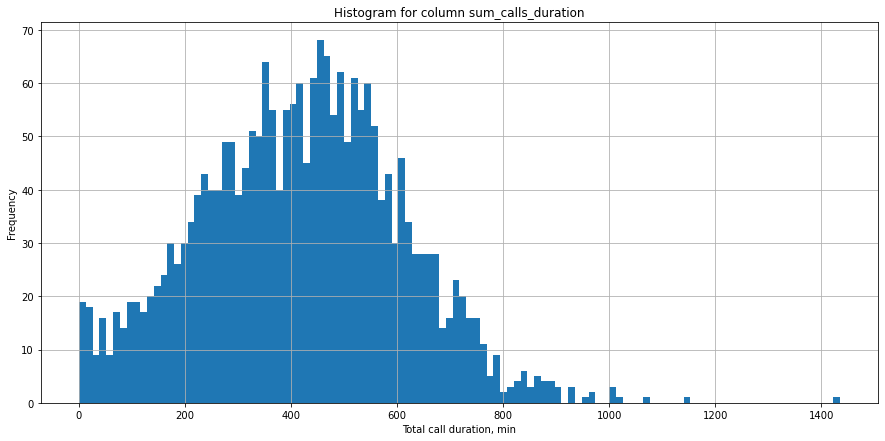

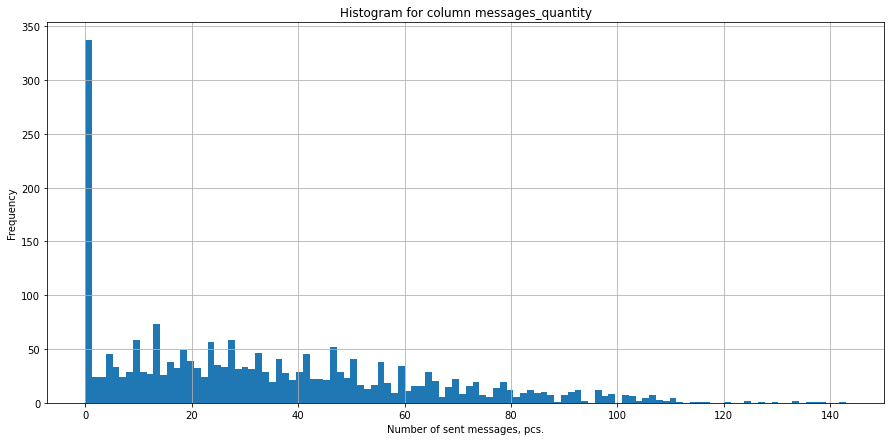

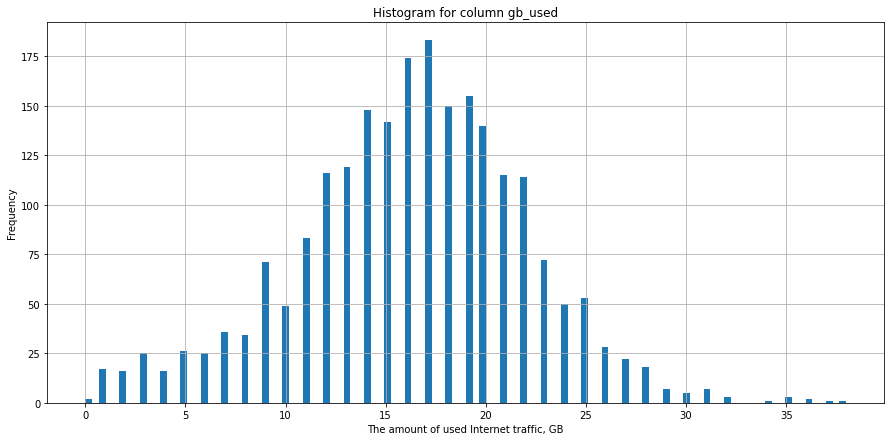

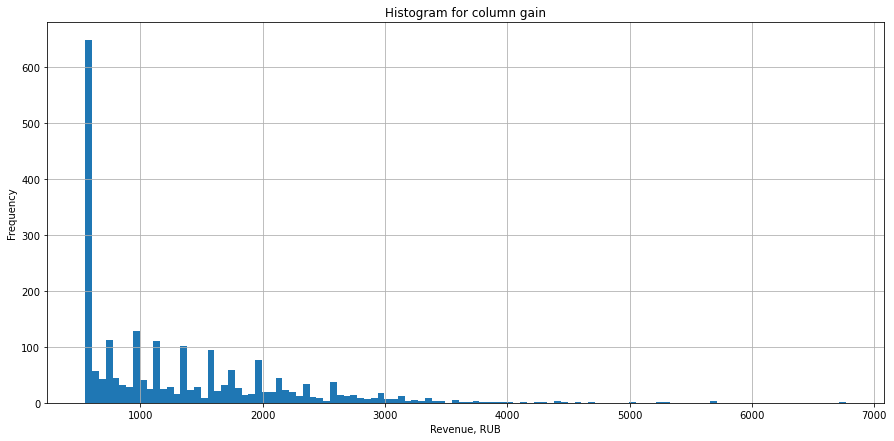

In [38]:
dict_of_columns = {'sum_calls_duration' : 'Total call duration, min',
                   'messages_quantity' : 'Number of sent messages, pcs.',
                   'gb_used' : 'The amount of used Internet traffic, GB',
                   'gain' : 'Revenue, RUB'}

print('Histograms for sample of the tariff "smart":')

for column in dict_of_columns.keys():
    ax = users_behavior_smart[column].plot(kind = 'hist', figsize = (15, 7), grid=True, bins=112)
    ax.set_title('Histogram for column ' + column)
    ax.set_xlabel(dict_of_columns[column])
    plt.show()

The histogram for the total call duration for the smart tariff has a bell-shaped form. Most values are in the range from 300 to 550 minutes, with an arithmetic mean of 418 minutes. Approximately 30% of the values are in the area beyond the limit of 500 minutes included in the subscription fee. The histogram shows that the call duration dataset is skewed to the left.

The histogram for the number of messages has one large local maximum near 0. This is an expected phenomenon - with the advent of instant messengers in our lives, people use the sms service less and less. Behind the value of 0 we see a very gentle "bell", beveled to the right, with a rather long "tail".

The histogram for used Internet traffic is an almost symmetrical "bell", where the mean and median are almost equal to each other. However, a slight slant to the right is clearly visible. The median value of the sample lies outside the 15 GB limit included in the tariff plan, which means that in more than half of the cases, users overuse Internet traffic.

The histogram for revenue has a peak at the value of 550 RUB - at the same time, this value is the first quartile for the sample. In other words, users of the smart tariff only meet the limit in 25% of cases; in 75% of cases, users pay extra for overspending. The histogram has rhythmic decreasing peaks that fade away with increasing revenue values. Such peaks arise due to the fact that the user pays 200 rubles for 1 GB of overspending on Internet traffic, which immediately makes a significant contribution to the amount of revenue (especially when compared with the cost of overspending by minutes - 3 RUB/min, and according to reports - 3 RUB/message).

Histograms for sample of the tariff "ultra":


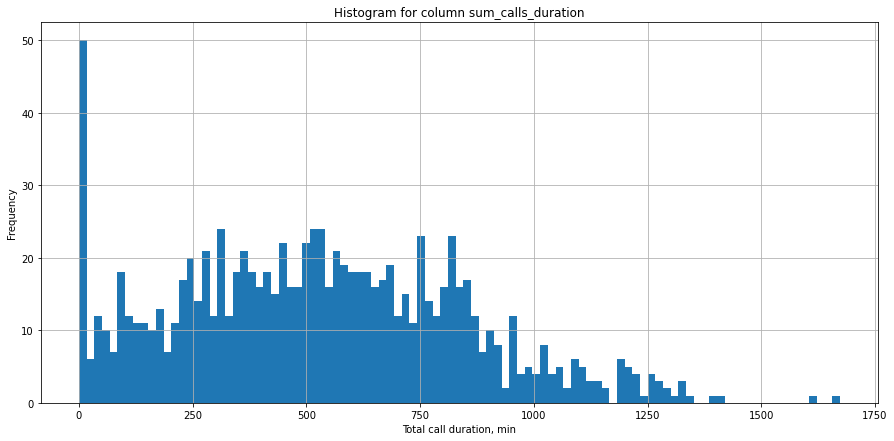

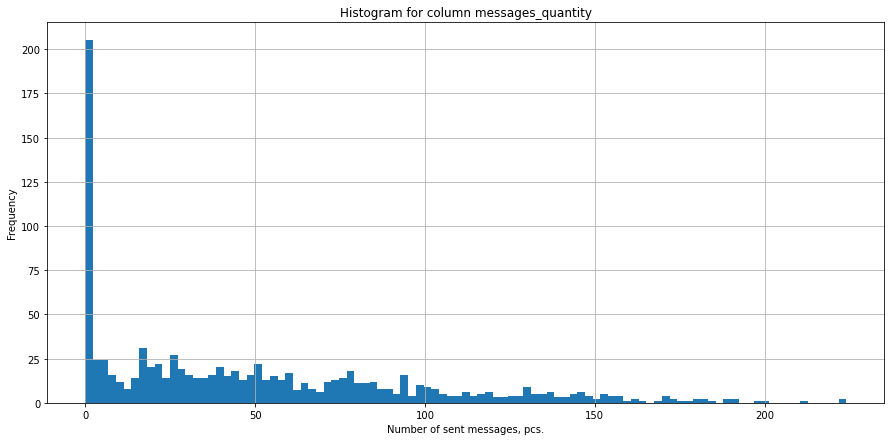

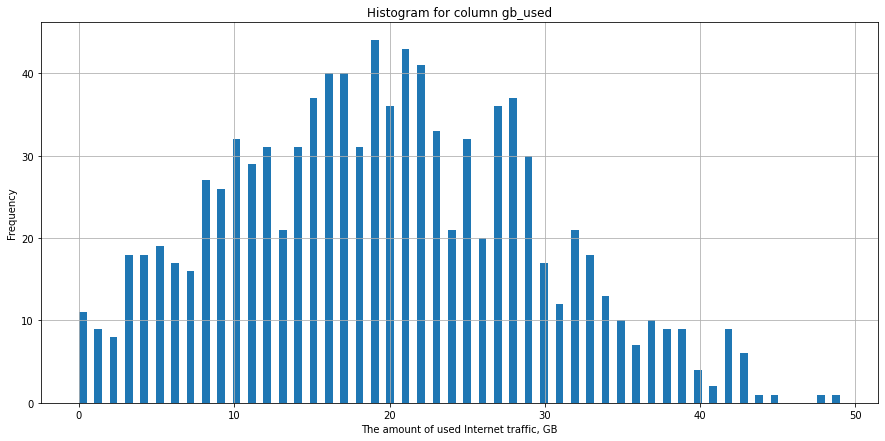

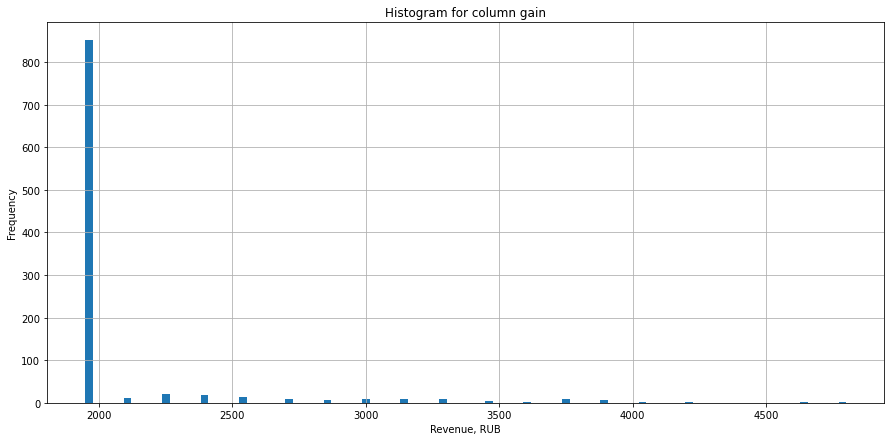

In [39]:
print('Histograms for sample of the tariff "ultra":')

for column in dict_of_columns.keys():
    ax = users_behavior_ultra[column].plot(kind = 'hist', figsize = (15, 7), grid=True, bins=99)
    ax.set_title('Histogram for column ' + column)
    ax.set_xlabel(dict_of_columns[column])
    plt.show()

Now let's describe the histograms for the parameters of the ultra tariff.

The call duration histogram has an energetic maximum at zero. That is, in a significant part of cases, calls are not used, which may be due to the good limit of the Internet included in the tariff - 30 GB, and users prefer calls from instant messengers. Despite the fact that the tariff also includes 3000 minutes of conversation, in no case this limit was reached, and the maximum was registered at a value of 1673 minutes.

According to the histogram by the number of messages, the maximum at the value of 0 is also visible. The same messengers are probably "to blame" here. In general, users are reluctant to use the possibility of sending SMS messages, which is confirmed by the fact that the limit of 1000 messages has never been reached. Moreover, the median for the sample is 38 messages, and the maximum is 224 messages. The histogram is not bell-shaped, and has a long "tail" of rare values that starts around 100.

The histogram for the volume of Internet used has a bell-shaped structure. It is noticeable here that in more than 75% of cases, users fit into the 30 GB limit included in the monthly fee. The median and mean values in this sample also almost coincide.

The histogram for the "Revenue" parameter has a very interesting look - one large peak is visible at the value of 1950 rubles. - this is the amount of the subscription fee for the ultra tariff. More than 75% of revenue values are at this mark. The remaining values in the sample are quite rare.

For a more visual comparison, let's display histograms for the revenue of two tariffs - Smart and Ultra on one chart:

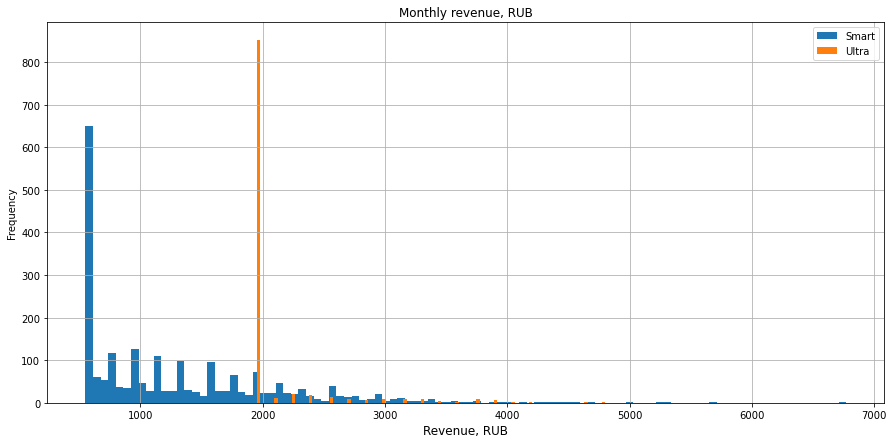

In [40]:
ax1 = users_behavior_smart['gain'].plot(kind = 'hist', figsize = (15, 7), grid=True, bins=100, label='Smart')
ax2 = users_behavior_ultra['gain'].plot(kind = 'hist', figsize = (15, 7), grid=True, bins=100, label='Ultra')
ax1.set_title('Monthly revenue, RUB')
ax1.set_xlabel('Revenue, RUB', fontsize = 12)
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
plt.show()

**Conclusion**

"Smart" tariff users require an average of 418 minutes of talk time per month, which is quite close to the 500 minute limit included in this tariff plan. About 30% of users overuse this limit. The tariff also includes 50 messages and 15 GB of Internet traffic. In about 75% of cases, smart users have enough of such a message limit, but many gigabytes of the Internet are not enough - an average of 16.33 GB and a median of 17 GB are already outside the volume included in the tariff. This means that in more than half of the cases, users are forced to purchase additional Internet traffic.

Users of the "ultra" tariff spend an average of 527 minutes of calls per month, and the maximum for the sample is reached at around 1673 minutes with a limit of 3000 minutes. In other words, the subscribers of the minutes of conversation included in the tariff are enough in full. A similar situation develops with SMS: the tariff includes 1000 messages, and subscribers on average spend only about 50 messages, while the maximum value is 224 messages sent per month. And only in terms of the volume of Internet traffic there are overruns, but they also occur quite rarely - in less than 25% of cases.

"Smart" subscribers overuse their limits much more often than "ultra" subscribers.

## Tests of hypotheses

Let's test the hypothesis that the average revenue of users of the "Ultra" and "Smart" tariffs are different. Let's start with the formulation of the null hypothesis. Since the null hypothesis is always formulated in such a way as to use the equal sign, in our case it will sound like this:<br><br>
*Average revenue of users of "Ultra" and "Smart" tariffs are equal*,<br><br>
and we formulate an alternative hypothesis for such a null hypothesis as:<br><br>
*Average revenue of users of "Ultra" and "Smart" tariffs differ*<br><br>
Since we are testing the equality of the averages of two independent populations for their samples, we use the `.ttest_ind()` method from the `scipy` library to test the hypothesis, applying it to columns with revenue from ultra and smart tariff samples. From the previous step, we saw that the variances in the revenue of both samples differ significantly from each other, so we will pass the `equal_var` parameter with the value `False` to the method. Let's set a critical level of statistical significance of 5%.

In [41]:
alpha = 0.05  # a critical level of statistical significance

results = st.ttest_ind(users_behavior_smart['gain'],
                       users_behavior_ultra['gain'],
                       equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis') 

p-value: 4.2606313931076085e-250
Rejecting the null hypothesis


We see that `pvalue` is very close to zero, and we reject the null hypothesis. This means that we do not reject the alternative hypothesis that the average revenue of users of the "Ultra" and "Smart" tariffs are different.

<br><br><br>

Now let's analyze the average revenue from customers from Moscow and from other regions.
To do this, add a column with the user's city `city` to the general dataframe `users_behavior`, and then select two samples - users from Moscow and users from other regions and calculate the average revenue for each sample.

In [42]:
users_behavior['city'] = np.nan
for i in users.index:
    users_behavior.loc[users_behavior['user_id'] == users.loc[i, 'user_id'],'city'] = users_behavior.loc[users_behavior['user_id'] == users.loc[i, 'user_id'],'city'].fillna(users.loc[i, 'city'])
users_behavior.sample(n=5, random_state=1)

,user_id,month_year,calls_quantity,sum_calls_duration,messages_quantity,mb_used,gb_used,tariff,gain,city
1719,1275,2018-10,77.0,470.0,29.0,18446.070312,19.0,smart,1350.0,Москва
2922,1459,2018-11,82.0,662.0,29.0,15475.200195,16.0,smart,1236.0,Магнитогорск
1895,1302,2018-06,27.0,171.0,77.0,19664.109375,20.0,smart,1631.0,Уфа
161,1025,2018-03,45.0,323.0,14.0,7332.689941,8.0,smart,550.0,Уфа
255,1040,2018-11,54.0,437.0,0.0,19871.371094,20.0,smart,1550.0,Сочи


In [43]:
users_behavior_Moscow = users_behavior[users_behavior['city'] == 'Москва'].copy()
users_behavior_other_city = users_behavior[users_behavior['city'] != 'Москва'].copy()

print('Average revenue of users from Moscow:', users_behavior_Moscow['gain'].mean())
print('Average user revenue from other regions:', users_behavior_other_city['gain'].mean())

Average revenue of users from Moscow: 1546.7135842880523
Average user revenue from other regions: 1524.9362274298885


Let's display the dispersion in the `gain` column for users from Moscow and for other users:

In [44]:
print('Dispersion of income of users from Moscow:', np.var(users_behavior_Moscow['gain'], ddof=1))
print('Dispersion of user revenue from other regions:', np.var(users_behavior_other_city['gain'], ddof=1))

Dispersion of income of users from Moscow: 565636.4670118855
Dispersion of user revenue from other regions: 654137.6285218047


Let's check if the average revenue of users from Moscow differs from the revenue of users from other regions. In this case, the formulation of the hypotheses will be as follows:

- Null hypothesis: the average revenue of users from Moscow and the average revenue of users from other regions are equal;
- Alternative hypothesis: the average revenue of users from Moscow differs from the revenue of users from other regions.

Let's apply the `.ttest_ind()` method again to the columns with revenue from user samples from Moscow and from other cities. Given that the variances are not equal, let's pass `equal_var = False` to the method. Set the critical level of statistical significance `alpha` to 5%.

In [45]:
alpha = 0.05

results = st.ttest_ind(users_behavior_Moscow['gain'],
                       users_behavior_other_city['gain'],
                       equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis') 

p-value: 0.5257376663729298
Failed to reject the null hypothesis


Now the `pvalue` is significantly higher than the level of statistical significance, so we cannot reject the null hypothesis that *the average revenue of users from Moscow and the average revenue of users from other regions are equal*.

**Conclusion**

The test showed that the hypothesis that the average revenue of users of the "Ultra" and "Smart" tariffs differ cannot be rejected. And the hypothesis that the average revenue of users from Moscow differs from the revenue of users from other regions is rejected.

## General conclusion

Based on five datasets containing information from 500 users, we received one summary table, in which for each user the number of calls made and minutes spent, the number of messages sent, the amount of traffic used, and revenue are indicated on a monthly basis. After analyzing this table, we were able to describe the behavior of customers of each tariff:
- users of the "Smart" tariff in 30% of cases overuse the limit of minutes, in more than half of the cases - the volume of the Internet, and in about 25% of cases - the limit of messages. At the same time, the average revenue of users of the tariff is 1289.97 RUB.
- users of the "Ultra" tariff allow overspending only in terms of the volume of Internet traffic, but the share of overspending is relatively small - only about 25% of cases. Of the included minutes and messages, subscribers spend less than half the amount. The average revenue of Ultra users is 2070.15 RUB.

We also tested the hypothesis on the samples provided to us that the average revenue of the general populations of users of the Ultra and Smart tariffs differ. The hypothesis was confirmed.

Considering that Ultra subscribers generally spend significantly less than the number of minutes of conversation and SMS included in the tariff, overspending on the Internet is rarely allowed, and the average revenue for this tariff is 60% more than for the more budgetary Smart, we can conclude that it is beneficial for Megaline to promote Ultra and offer it to new subscribers in the first place.

At the same time, it is important to take into account that the hypothesis that the average revenue of users from Moscow and the average revenue of subscribers from other regions is different was rejected (in other words, the average revenue is the same). Therefore, it makes no sense to make different tariff plans for Moscow and for other regions.